# Load Packages

In [40]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [41]:
# Load additional scikit learn packages! if you need
from scipy import ndimage 
from skimage.transform import rotate
import random

In [43]:
random.seed(4)

# Load Data Points (Do not modify the following block)

In [18]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

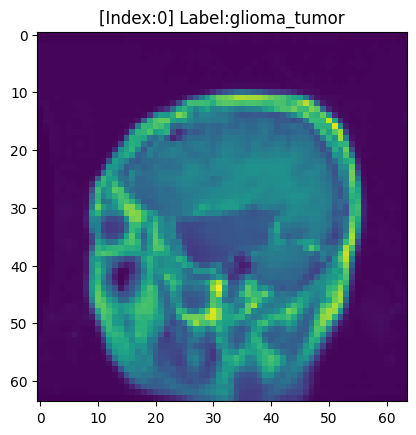

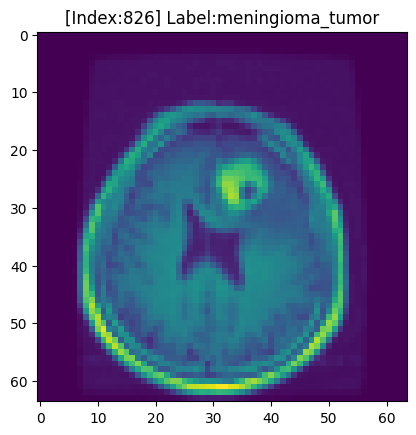

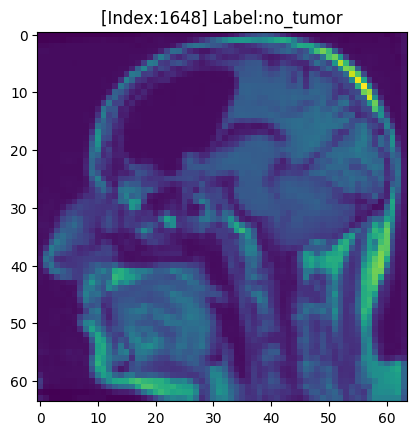

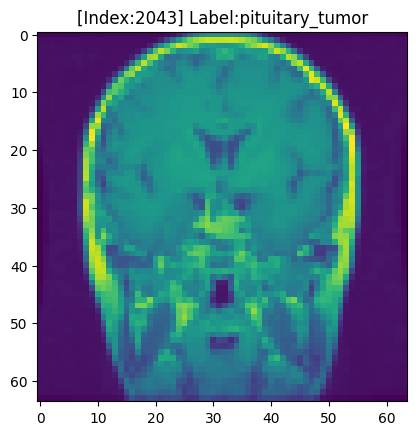

In [4]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [44]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Data Augmentation 

In [45]:
#blur
target_labels = ['meningioma_tumor','no_tumor']

before_images = X_train.reshape((-1, image_size, image_size))

blurred_images = []
blurred_y = []

for i in range(len(y_train)):
    if (y_train[i] in target_labels):
        blurred_img = ndimage.uniform_filter(before_images[i])
        blurred_images.append(blurred_img)
        blurred_y.append(y_train[i])

blurred_images = np.array(blurred_images)

blurred_X = blurred_images.reshape((-1, image_size**2))
blurred_y = np.array(blurred_y)

In [46]:
#rotate
rotated_images = []
rotated_y = []

for i in range(len(y_train)):
    rotated_img = rotate(before_images[i], random.randint(-20, 20))
    rotated_images.append(rotated_img)
    rotated_y.append(y_train[i])

rotated_images = np.array(rotated_images)

rotated_X = rotated_images.reshape((-1, image_size**2))
rotated_y = np.array(rotated_y)

In [47]:
#concatenate
X_train = np.concatenate((X_train, blurred_X, rotated_X), axis=0)
y_train = np.concatenate((y_train, blurred_y, rotated_y), axis=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for tumor classification
- Find the best random seed as well and fix it to reproduce your result on other computers.

In [48]:
#TODO
#1. Create a classification object in scikit learn package (such as perceptron, logistic regression, or other classification algorithms)
#2. Fit the object to training dataset
#3. Predict the label of test data point (X_test)
# - Do not change the variable name "y_pred"
model = sklearn.ensemble.HistGradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = np.zeros_like(y_test)
y_pred = model.predict(X_test)

0.9396051103368177


### Print accuracy (do not modify the following block)

In [39]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93
